In [1]:
import numpy as np
import cv2 as cv
import matplotlib.pyplot as plt

In [2]:
def histEqualization(img):
    colors, counts = np.unique(img.flatten(), return_counts=True, axis=0)
    sort_ind = np.argsort(colors)
    cdf_min = counts[sort_ind[0]]
    total = (img.shape[0]*img.shape[1])
    cdf = np.zeros((1,256))
    
    colors = colors[np.newaxis, :]
    counts = counts[np.newaxis, :]
    np.put(cdf, colors, counts)
    
    cdf = np.cumsum(cdf)
    return np.uint8(np.round(255*((cdf[img]-cdf_min)/(total - cdf_min))))

In [3]:
def histMatching(src, ref):
    s_colors, s_counts = np.unique(src.flatten(), return_counts=True, axis=0)
    r_colors, r_counts = np.unique(ref.flatten(), return_counts=True, axis=0)
    s_cdf = np.zeros((1,256))
    r_cdf = np.zeros((1,256))

    s_colors = s_colors[np.newaxis, :]
    s_counts = s_counts[np.newaxis, :]
    
    r_colors = r_colors[np.newaxis, :]
    r_counts = r_counts[np.newaxis, :]
    
    np.put(s_cdf, s_colors, s_counts)
    np.put(r_cdf, r_colors, r_counts)
    
    s_cdf = np.round(255*(np.cumsum(s_cdf)/(src.shape[0]*src.shape[1])))
    r_cdf = np.round(255*(np.cumsum(r_cdf)/(ref.shape[0]*ref.shape[1])))
    
    t_map = np.zeros((1,256))
    for i in range(256):
        diff_arr = r_cdf - s_cdf[i]
        bool_arr = np.where(diff_arr <= -1, True, False)
        if np.all(bool_arr) == True:
            t_map[0][i] = np.argmin((np.abs(diff_arr)), axis = 0)
        else:
            t_map[0][i] = np.argmin(np.ma.masked_array(diff_arr, bool_arr))
    func = np.vectorize(lambda x : t_map[0][x])
    return np.uint8(func(src))

## Part 1
### Applying histogram equalization on image of choice

In [4]:
im = cv.imread('./images/church.png', cv.IMREAD_GRAYSCALE)
imHeq = histEqualization(im)
imHeq2 = histEqualization(imHeq)

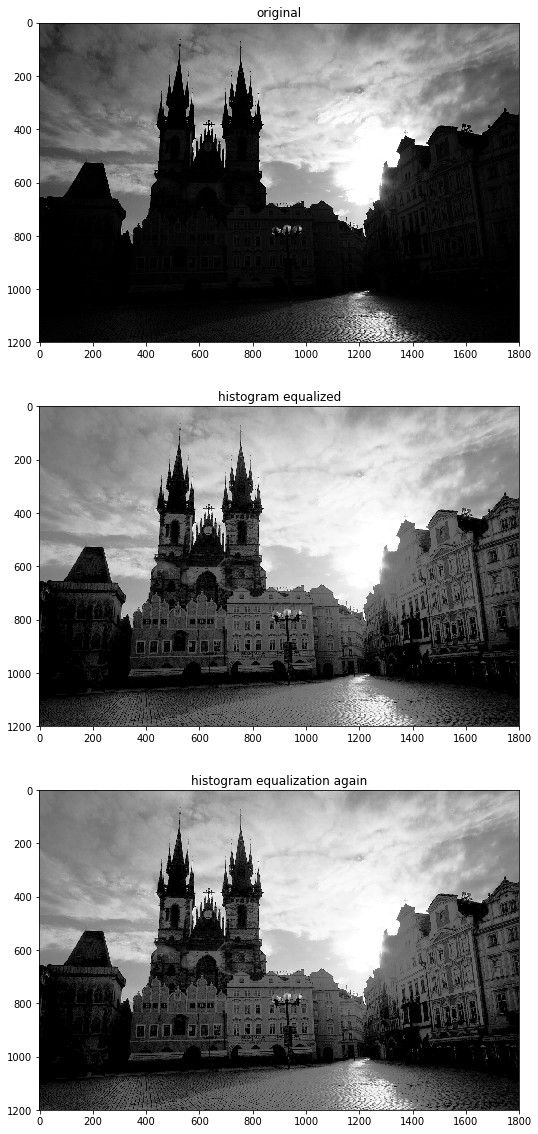

In [5]:
_, images = plt.subplots(3,1, figsize = (20,20))
images[0].imshow(im, cmap = 'gray', vmin = 0, vmax = 255)
images[0].set_title('original')
images[1].imshow(imHeq, cmap = 'gray', vmin = 0, vmax = 255)
images[1].set_title('histogram equalized')
images[2].imshow(imHeq2, cmap = 'gray', vmin = 0, vmax = 255)
images[2].set_title('histogram equalization again')

plt.show()

### No change after applying histogram equalization on histogram equalized image
> Applying histogram equalization again on already histogram equalized image gives no change as the cdf of the image is uniform (equalized), thus equalizing it has no effect

## Part 2

### Histogram matching of images with similar histograms 

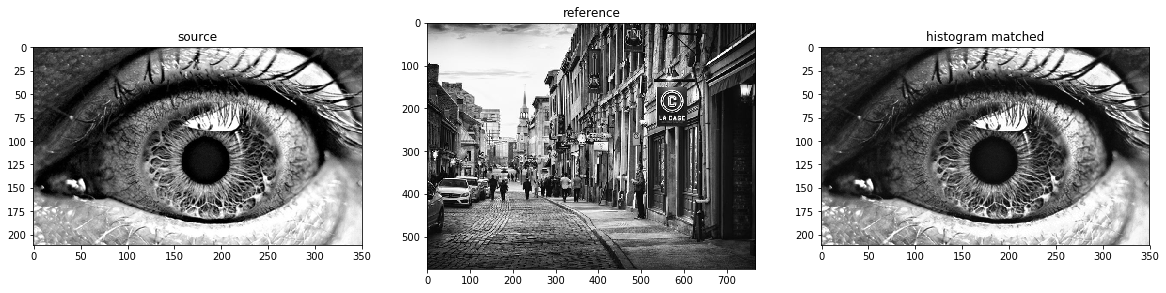

In [6]:
src = cv.imread('./images/hist1.png', cv.IMREAD_GRAYSCALE)
ref = cv.imread('./images/hist2.jpg', cv.IMREAD_GRAYSCALE)

_, images = plt.subplots(1,3, figsize = (20,20))
images[0].imshow(src, cmap = 'gray', vmin = 0, vmax = 255)
images[0].set_title("source")

images[1].imshow(ref, cmap = 'gray', vmin = 0, vmax = 255)
images[1].set_title("reference")

images[2].imshow(histMatching(src, ref), cmap = 'gray', vmin = 0, vmax = 255)
images[2].set_title("histogram matched")

plt.show()

### Histogram matching of images ( Dark -> Light )

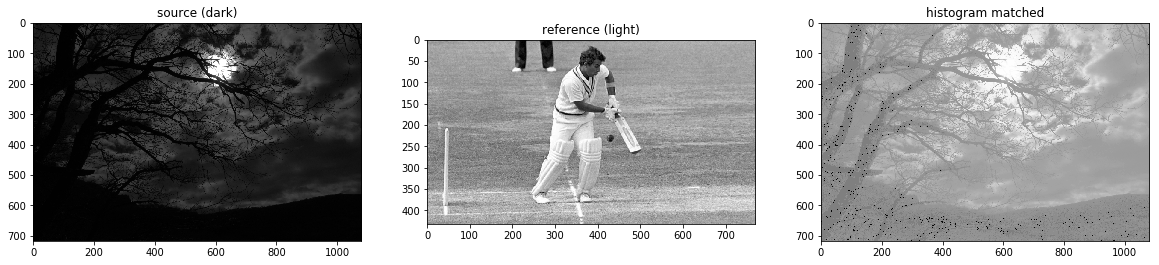

In [7]:
src = cv.imread('./images/dark.jpg', cv.IMREAD_GRAYSCALE)
ref = cv.imread('./images/light.jpeg', cv.IMREAD_GRAYSCALE)

_, images = plt.subplots(1,3, figsize = (20,20))
images[0].imshow(src, cmap = 'gray', vmin = 0, vmax = 255)
images[0].set_title("source (dark)")

images[1].imshow(ref, cmap = 'gray', vmin = 0, vmax = 255)
images[1].set_title("reference (light)")

images[2].imshow(histMatching(src, ref), cmap = 'gray', vmin = 0, vmax = 255)
images[2].set_title("histogram matched")

plt.show()

### Histogram matching of images ( Light -> Dark )

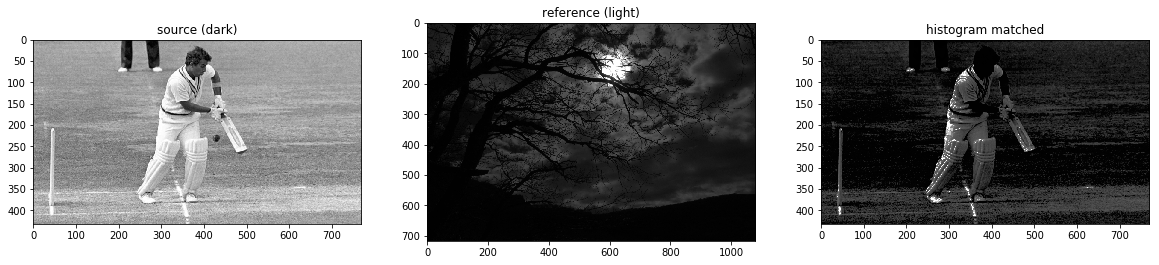

In [8]:
src = cv.imread('./images/light.jpeg', cv.IMREAD_GRAYSCALE)
ref = cv.imread('./images/dark.jpg', cv.IMREAD_GRAYSCALE)

_, images = plt.subplots(1,3, figsize = (20,20))
images[0].imshow(src, cmap = 'gray', vmin = 0, vmax = 255)
images[0].set_title("source (dark)")

images[1].imshow(ref, cmap = 'gray', vmin = 0, vmax = 255)
images[1].set_title("reference (light)")

images[2].imshow(histMatching(src, ref), cmap = 'gray', vmin = 0, vmax = 255)
images[2].set_title("histogram matched")

plt.show()